<a href="https://colab.research.google.com/github/GiriSrinivasan/Human-Behavior-Project-CaseStudy-9/blob/main/Human_Behavior_Project_CaseStudy_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning library
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Reading the dataset

In [ ]:
train = pd.read_csv('C:/Data Science/Case Studies/Human behaviour project/train.csv')
test = pd.read_csv('C:/Data Science/Case Studies/Human behaviour project/test.csv')

In [ ]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
train.shape

(7352, 563)

In [ ]:
test.shape

(2947, 563)

### Checking for missing values

In [ ]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

### Exploring the dataset

In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


## EDA

In [ ]:
temp = train["Activity"].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [ ]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [ ]:
df.head()

,labels,values
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286
3,WALKING,1226
4,WALKING_UPSTAIRS,1073


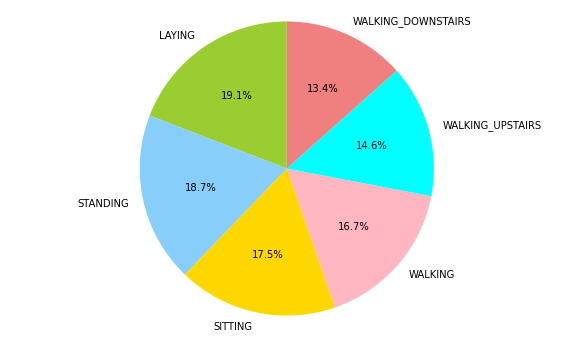

In [ ]:
plt.figure(figsize=(10,6))
labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
plt.pie(sizes,colors=colors,labels=labels,startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Data Processing

In [ ]:
x_train = pd.DataFrame(train.drop(['Activity','subject'], axis=1))
y_train_label = train.Activity.values.astype(object)

x_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
y_test_label = test.Activity.values.astype(object)

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)

In [ ]:
y_train

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
encoder.fit(y_test_label)
y_test = encoder.transform(y_test_label)

In [ ]:
y_test

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
num_cols = x_train._get_numeric_data().columns
num_cols.size

561

## Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print((accuracy_score(y_test, y_pred)*100), '%')

89.98982015609094 %


In [ ]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

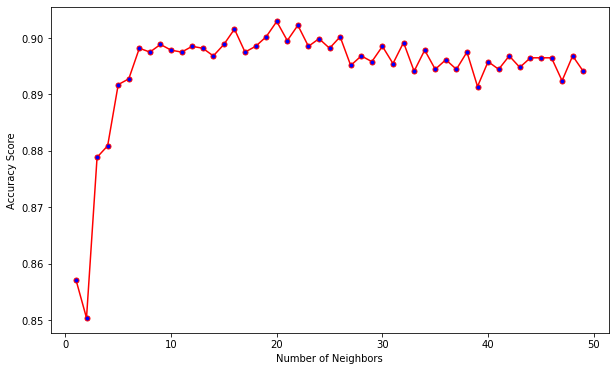

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [ ]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [ ]:
y_pred_label

['STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'SITTING',
 'SITTING',
 'STANDING',
 'SITTING',
 'SITTING',
 'SITTING',
 'STANDING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'SITTING',
 'STANDING',
 'STANDING',
 'STANDING',
 'SITTING',
 'SITTING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'WALKING',
 'WALKING',
 'WALKING',
 'W

In [ ]:
print(confusion_matrix(y_test_label, y_pred_label))

[[513  13  11   0   0   0]
 [  3 390  97   0   0   1]
 [  0  22 510   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  45 327  48]
 [  0   0   0  39   1 431]]


In [ ]:
print(classification_report(y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

